# Sales Conversion Optimization

Link to kaggle challenge:

*https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking?resource=download*

----

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/KAG_conversion_data.csv')

In [4]:
data.shape

(1143, 11)

## 1. Data Cleaning

In [21]:
## dropping unnecessary columns
data.drop("fb_campaign_id", axis=1, inplace=True)

### 2.1 Missing Values

In [16]:
data.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

### 2.2 Duplicates

In [18]:
data.duplicated().sum()

0

### 2.3 Outliers

In [19]:
data.head(2)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0


Text(0.5, 1.0, 'Amount of Ads per Interest Group')

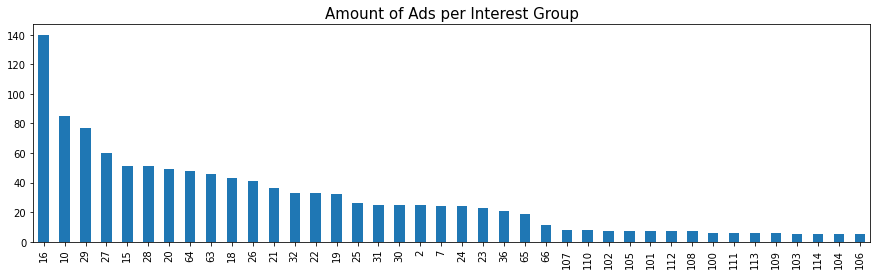

In [42]:
## checking for outliers in 'interst'
plt.figure(figsize=(15,4))
data.interest.value_counts().plot(kind="bar")
plt.title("Amount of Ads per Interest Group", size=15);

Text(0.5, 1.0, 'Distribution of Impressions')

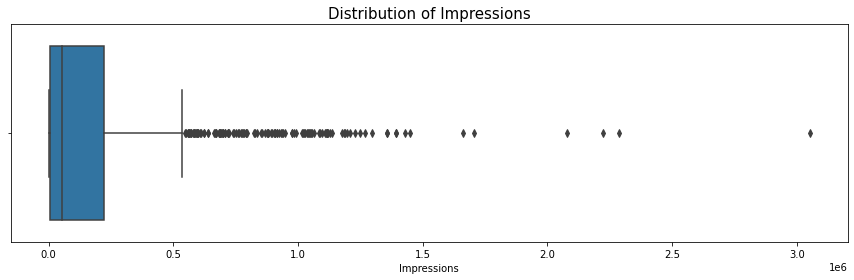

In [41]:
## checking for outliers in Impressions
plt.figure(figsize=(15,4))
sns.boxplot(x=data.Impressions)
plt.title("Distribution of Impressions", size=15);

In [57]:
## Inspecting Outliers
data.sort_values(by="Impressions", ascending=False)[:5]

,ad_id,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
525,1121100,1178,30-34,M,15,3052003,340,639.949998,60,17
765,1121601,1178,45-49,M,16,2286228,353,603.380002,16,7
860,1121814,1178,30-34,F,27,2223278,421,612.300003,38,13
528,1121104,1178,30-34,M,16,2080666,202,360.150001,40,21
867,1121824,1178,30-34,F,29,1705246,295,429.479998,23,10


(Outliers are decided to be left in the dataset, as there is no evidence for them being wrong data entries)

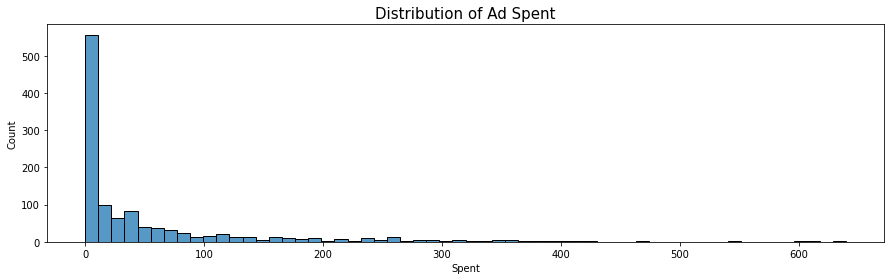

In [54]:
## checking for outliers in 'Spent'
plt.figure(figsize=(15,4))
sns.histplot(x=data.Spent)
plt.title("Distribution of Ad Spent", size=15);

In [56]:
## Inspecting Outliers
data.sort_values(by="Spent", ascending=False)[:5]

,ad_id,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
525,1121100,1178,30-34,M,15,3052003,340,639.949998,60,17
860,1121814,1178,30-34,F,27,2223278,421,612.300003,38,13
765,1121601,1178,45-49,M,16,2286228,353,603.380002,16,7
1026,1122265,1178,45-49,F,27,1428421,367,541.700002,10,0
995,1122193,1178,45-49,F,10,1358324,346,465.079998,8,2


(Outliers are decided to be left in the dataset, as there is no evidence for them being wrong data entries)

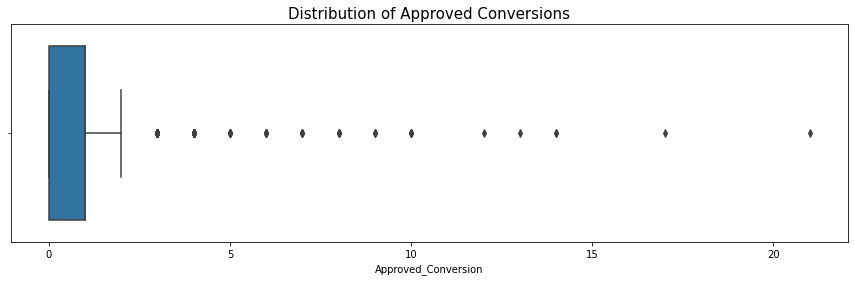

In [55]:
## checking outliers for conversions
plt.figure(figsize=(15,4))
sns.boxplot(x=data.Approved_Conversion)
plt.title("Distribution of Approved Conversions", size=15);

**Notes:**

The distributions for all continuous variables are highly skewed, with some extreme values compared to measures of centrality. The data appears to be real however, and represents actual, real phenomena (such as increases in ad spend correlating with increases in Impressions and Conversions; correlations are examined in the next section). 

These observations are therefore left in the dataset.

## 2. Exploraroty Analysis

In [5]:
## amount of unique ads
len(data.ad_id.unique())

1143

In [6]:
## amount of company campaigns
len(data.xyz_campaign_id.unique())

3

In [7]:
## amount of unique fb ad campaigns
len(data.fb_campaign_id.unique())

691

In [8]:
## amount of unique ads per company campaign
data.groupby("xyz_campaign_id")["ad_id"].nunique()

xyz_campaign_id
916      54
936     464
1178    625
Name: ad_id, dtype: int64

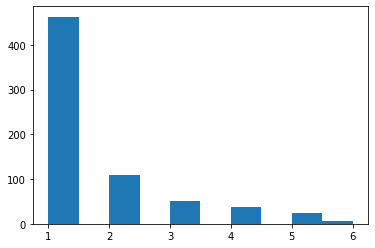

In [9]:
## amount of nr of ads per fb campaign, visualized
tmp = data.groupby("fb_campaign_id")["ad_id"].nunique()
plt.hist(tmp);

##### Notes:

1. 3 campaigns internally in the company
2. 691 registered campaigns on fb
3. 1143 individual ads in total
4. unevenly distributed amounts of individual ads per campaign (from 1 to 6)

#### Average amount spent per ad

In [10]:
avg = round(data.Spent.median(),2)

print(f'Average amount (median, due to skew) spent per ad: {avg}')

Average amount (median, due to skew) spent per ad: 12.37


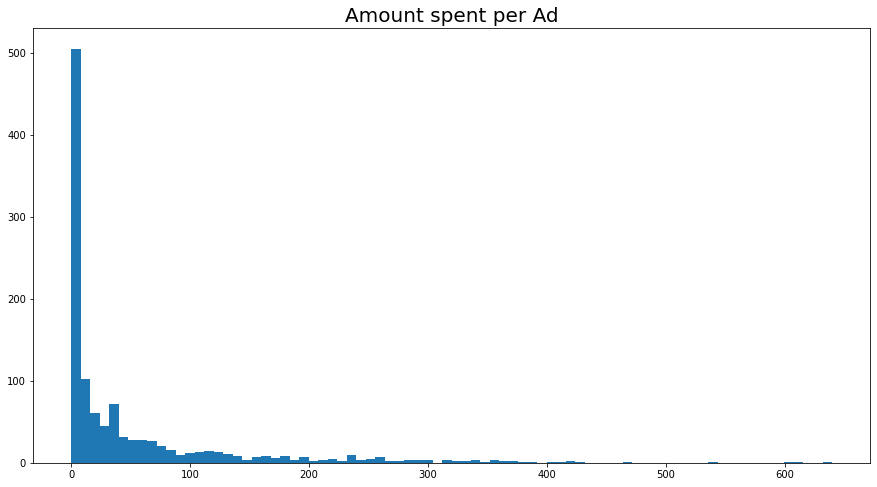

In [11]:
plt.figure(figsize=(15,8))
plt.hist(data.Spent, bins=80)

plt.title("Amount spent per Ad", size=20);

#### Number of conversions

/Users/garritwilson/.pyenv/versions/3.8.12/envs/li-monitoring/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


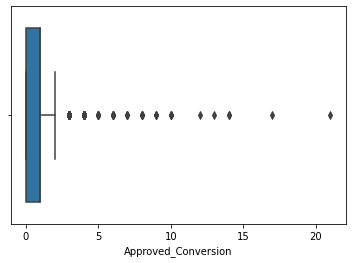

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(data.Approved_Conversion);

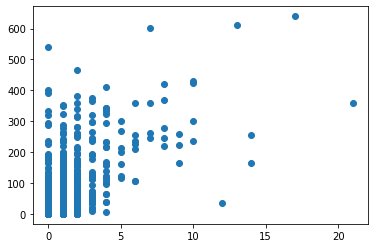

In [13]:
## Is there a relationship between Ad Spend and Conversion?
plt.scatter(x= data.Approved_Conversion, y= data.Spent)

<AxesSubplot:xlabel='Approved_Conversion', ylabel='Spent'>

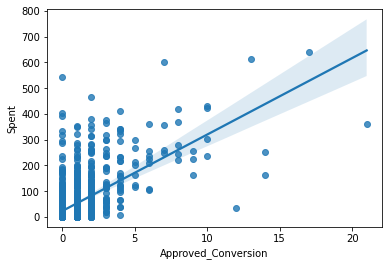

In [14]:
## Is there a relationship between Ad Spend and Conversion?
sns.regplot(x = "Approved_Conversion",
            y= "Spent",
           data= data)

## 3. Data Preparation for Modeling

**Add: Feature Scaling

*subsequently delete / merge section*

In [ ]:
data.head(2)

In [ ]:
data.drop("fb_campaign_id", axis=1, inplace= True)

In [ ]:
data["xyz_campaign_id"].replace({916:"campaign_a" ,936:"campaign_b" ,1178:"campaign_c"}, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in ["xyz_campaign_id", "age", "gender"]:
    
    encoder.fit(data[col])
    
    data[col] = encoder.transform(data[col])
    
    print(col, data[col].nunique())

## 4. Feature Engineering

1. CTR (click-through-rate)
2. Conversion Rate
3. Cost per Click
4. Cost per Conversion

In [ ]:
data.head()

In [ ]:
## calculating CTR
data["CTR (%)"] = (data["Clicks"] / data["Impressions"]) * 100

In [ ]:
## calculating Conversion Rate

mask = (data["Clicks"] != 0)
data_valid = data[mask]

data["CR (%)"] = 0

data.loc[mask, "CR (%)"] = (data_valid["Approved_Conversion"] / data_valid["Clicks"]) * 100

*https://stackoverflow.com/questions/33769860/pandas-apply-but-only-for-rows-where-a-condition-is-met*

In [ ]:
## calculating Cost per Click

mask = (data["Clicks"] != 0)
data_valid = data[mask]

data["CpC"] = 0

data.loc[mask, "CpC"] = data["Clicks"] / data["Spent"]

In [ ]:
## calculating cost per conversion

mask = (data["Spent"] != 0) & (data["Approved_Conversion"] != 0)
data_valid = data[mask]

data["CpConv"] = 0

data.loc[mask, "CpConv"] = data["Spent"] / data["Approved_Conversion"]

### Clustering as part of Feature Engineering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters= 4)

In [ ]:
km.fit(data.drop(["Total_Conversion", "Approved_Conversion"], axis= 1))

In [ ]:
data["Cluster"] = km.labels_

In [ ]:
data.head()

**(Missing: Feature Scaling!)**

## 5. Modeling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
forest = RandomForestRegressor(n_estimators= 100)

In [ ]:
X = data.drop(["ad_id","Approved_Conversion", "Total_Conversion"], axis= 1)
y = data["Approved_Conversion"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size= 0.33)

In [ ]:
forest.fit(X_train, y_train)

## 6. Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred = forest.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

## Bonus Section: Building a ML - Pipeline

# Sandbox